In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\ml\modular\ml-class\Data\gene_expression.csv")

In [44]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

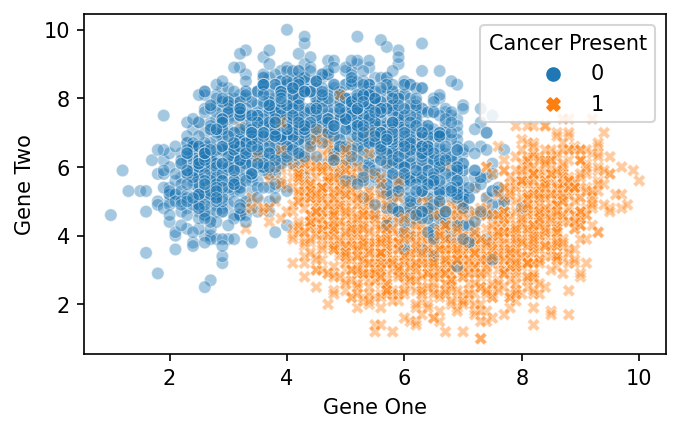

In [45]:
plt.figure(figsize=(5,3),dpi=150)
sns.scatterplot(data=df,x="Gene One",y="Gene Two",hue="Cancer Present",alpha=0.4,style="Cancer Present")

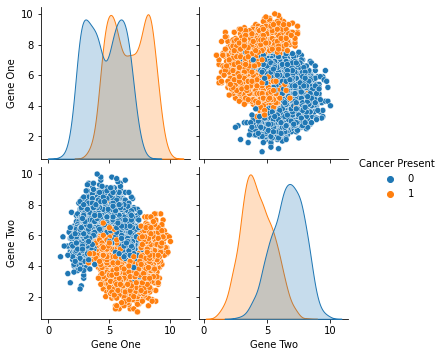

In [46]:
sns.pairplot(data=df,hue="Cancer Present")

In [47]:
x=df.drop("Cancer Present",axis=1)

In [48]:
y=df["Cancer Present"]

In [49]:
df.shape

(3000, 3)

In [50]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=101)

# SCALE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'} or callable, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighbors of

In [53]:
knn_model=KNeighborsClassifier(n_neighbors=1)

In [54]:
knn_model.fit(scaled_x_train,y_train)


KNeighborsClassifier(n_neighbors=1)

In [55]:
y_pred=knn_model.predict(scaled_x_test)

In [56]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [57]:
confusion_matrix(y_test,y_pred)

array([[118,  18],
       [ 10, 154]], dtype=int64)

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       136
           1       0.90      0.94      0.92       164

    accuracy                           0.91       300
   macro avg       0.91      0.90      0.91       300
weighted avg       0.91      0.91      0.91       300



In [59]:
df["Cancer Present"].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

In [60]:
#choosing value of k for knn

In [61]:
#Elbow method
test_error_rate=[]
for k in range(1,30):
    knn_model=KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_x_train,y_train)
    y_pred_test=knn_model.predict(scaled_x_test)
    test_error=1-accuracy_score(y_test,y_pred_test)
    test_error_rate.append(test_error)
test_error_rate

[0.09333333333333338,
 0.10999999999999999,
 0.08666666666666667,
 0.09333333333333338,
 0.07999999999999996,
 0.07999999999999996,
 0.08333333333333337,
 0.07666666666666666,
 0.08999999999999997,
 0.08333333333333337,
 0.08333333333333337,
 0.09333333333333338,
 0.09333333333333338,
 0.08666666666666667,
 0.07999999999999996,
 0.07999999999999996,
 0.07666666666666666,
 0.07999999999999996,
 0.07333333333333336,
 0.07666666666666666,
 0.07333333333333336,
 0.07666666666666666,
 0.07666666666666666,
 0.07666666666666666,
 0.07333333333333336,
 0.07333333333333336,
 0.07333333333333336,
 0.07333333333333336,
 0.07333333333333336]

Text(0.5, 0, 'kValue')

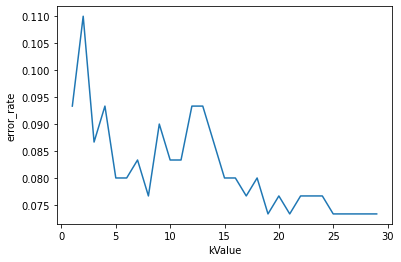

In [62]:
plt.plot(range(1,30),test_error_rate)
plt.ylabel("error_rate")
plt.xlabel("kValue")


In [63]:
knn_model.get_params()#model parameters

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 29,
 'p': 2,
 'weights': 'uniform'}

In [64]:
#method 2 by using pipeline fauction doing GridSearchCV


In [65]:
#pipeline--------->
operation=[("sacler",scaler),("knn",knn_model)]


In [66]:
from sklearn.pipeline import Pipeline
pipe=Pipeline(operation)

In [67]:
from sklearn.model_selection import GridSearchCV



In [68]:
k_values = list(range(1,20))
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [74]:
param_grid={"knn__n_neighbors":k_values,
"knn__metric":["euclidean"] }

In [76]:
full_cv_classifier=GridSearchCV(pipe,param_grid,cv=5,scoring = 'accuracy')

In [77]:
full_cv_classifier.fit(scaled_x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sacler', StandardScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_neighbors=29))]),
             param_grid={'knn__metric': ['euclidean'],
                         'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [78]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('sacler', StandardScaler()),
  ('knn', KNeighborsClassifier(metric='euclidean', n_neighbors=9))],
 'verbose': False,
 'sacler': StandardScaler(),
 'knn': KNeighborsClassifier(metric='euclidean', n_neighbors=9),
 'sacler__copy': True,
 'sacler__with_mean': True,
 'sacler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'euclidean',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 9,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [81]:
full_pred=full_cv_classifier.predict(scaled_x_test)

In [82]:
print(classification_report(y_test, full_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       136
           1       0.92      0.91      0.92       164

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300

